In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm


**Black Scholes Pricing Model**

Pricing European Call Options

In [2]:
def call_calculation(spot, strike, rf, sigma, time):  # time in years
    d1 = (log(spot / strike) + (rf + 0.5 * sigma**2) * time) / (sigma * sqrt(time))
    d2 = d1 - sigma * sqrt(time)
    call = spot * norm.cdf(d1) - strike * exp(-rf * time) * norm.cdf(d2)
    return call

In [3]:
def put_calculation(spot, strike, rf, sigma, time):
    d1 = (log(spot / strike) + (rf + 0.5 * sigma**2) * time) / (sigma * sqrt(time))
    d2 = d1 - sigma * sqrt(time)
    put = strike * exp(-rf * time) * norm.cdf(-d2) - spot * norm.cdf(-d1)
    return put

In [4]:
def plot_price_vs_spot(strike, rf, sigma, time, option_type="call"): # For fixed volatility
    spot_prices = np.linspace(50, 150, 100)
    prices = []

    for S in spot_prices:
        if option_type == "call":
            prices.append(call_calculation(S, strike, rf, sigma, time))
        else:
            prices.append(put_calculation(S, strike, rf, sigma, time))

    plt.plot(spot_prices, prices)
    plt.title(f"{option_type.capitalize()} Option Price vs Spot Price")
    plt.xlabel("Spot Price")
    plt.ylabel("Option Price")
    plt.grid(True)
    plt.show()

In [5]:
def plot_price_vs_volatility(spot, strike, rf, time, option_type="call"): # For fixed spot 
    volatilities = np.linspace(0.01, 1.0, 100)
    prices = []

    for sigma in volatilities:
        if option_type == "call":
            prices.append(call_calculation(spot, strike, rf, sigma, time))
        else:
            prices.append(put_calculation(spot, strike, rf, sigma, time))

    plt.plot(volatilities, prices)
    plt.title(f"{option_type.capitalize()} Option Price vs Volatility")
    plt.xlabel("Volatility")
    plt.ylabel("Option Price")
    plt.grid(True)
    plt.show()    

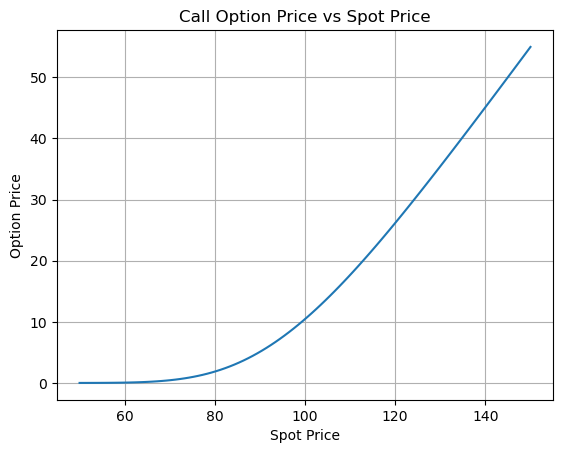

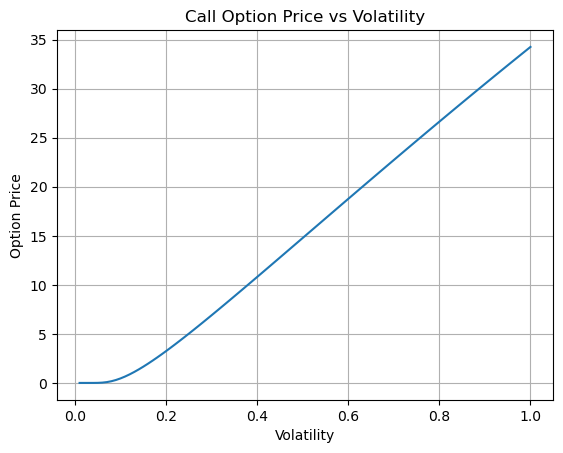

In [6]:
call_price = call_calculation(100, 120, 0.05, 0.2, 1)
plot_price_vs_spot(100, 0.05, 0.2, 1, option_type="call") # Fixed volatility
plot_price_vs_volatility(100, 120, 0.05, 1)